## Import all Libaries and Csvs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

In [3]:
ave_monthspend = pd.read_csv('AW_AveMonthSpend.csv')
bike_buyer = pd.read_csv('AW_BikeBuyer.csv')
work_cust = pd.read_csv('AdvWorksCusts.csv')
#ave_monthspend.tail()

In [4]:
# Combine all three csv
work_cust['BikeBuyer'] = bike_buyer['BikeBuyer']
work_cust['AveMonthSpend'] = ave_monthspend['AveMonthSpend']
work_cust.head().transpose()

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


## Ave_MonthSpend

ave_monthspend['AveMonthSpend'].describe()

#### Duplicates
print(ave_monthspend.shape)
print(ave_monthspend.CustomerID.unique().shape)

before = ave_monthspend.shape[0]
unique = ave_monthspend.CustomerID.unique().shape[0]
after = before - unique
print("Difference:", after)

## Bike Buyer

#bike_buyer = pd.read_csv('AW_BikeBuyer.csv')
print(bike_buyer.shape)
bike_buyer.head()

#### Question 6
bike_buyer['BikeBuyer'].value_counts()

#### Duplicates
print(bike_buyer.shape)
print(bike_buyer.CustomerID.unique().shape)

before = bike_buyer.shape[0]
unique = bike_buyer.CustomerID.unique().shape[0]
after = before - unique
print("Difference:", after)

#### Check columns that have null value
bike_buyer.astype(np.object).isnull().any()

## Works Custs

#work_cust = pd.read_csv('AdvWorksCusts.csv')
print(work_cust.shape)
work_cust.head().transpose()

#### Question 7
#### Select the correct order (from lowest to highest) that 
#### ranks the median YearlyIncome by Occupation:

work_cust.groupby('Occupation')['YearlyIncome'].median()

In [5]:
# Df contains 115 duplicates
cont_duplicates = work_cust.shape[0]
unique_df = work_cust.CustomerID.unique().shape[0]
print("Total:", cont_duplicates,
      "Unique:", unique_df)
print(cont_duplicates-unique_df)

Total: 16519 Unique: 16404
115


In [6]:
# Remove duplicates and keep the lastest one
print(cont_duplicates)
work_cust.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(work_cust.shape[0])

16519
16404


#### Check if any columns has null value
work_cust.astype(np.object).isnull().any()

In [7]:
work_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16518
Data columns (total 25 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            273 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404

In [8]:
work_cust.Gender.value_counts()

M    8290
F    8114
Name: Gender, dtype: int64

In [9]:
# Drop columns with too many missing values
work_cust.drop(['Title','MiddleName','Suffix', 'AddressLine2'], axis = 1, inplace = True)

In [10]:
# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


work_cust['Age'] = work_cust['BirthDate'].apply(calculate_age)

# Convert age to integer
work_cust['Age'] = work_cust['Age'].astype('int64')

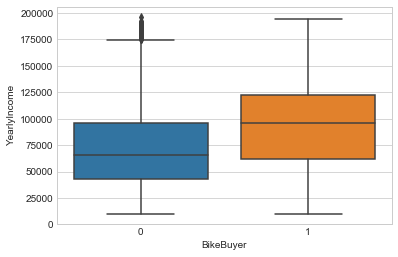

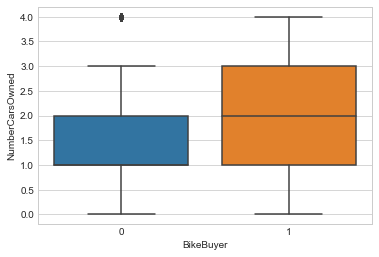

In [11]:
def plot_box(work_cust, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x, col, data=work_cust)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','NumberCarsOwned']
plot_box(work_cust, num_cols)

Occupation


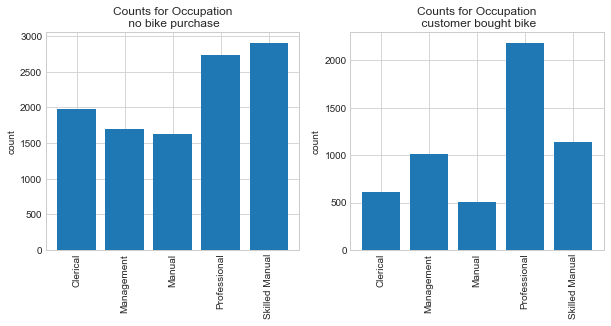

Gender


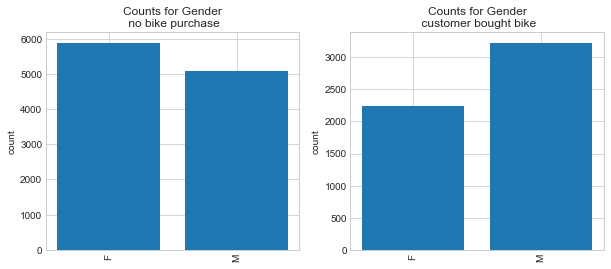

MaritalStatus


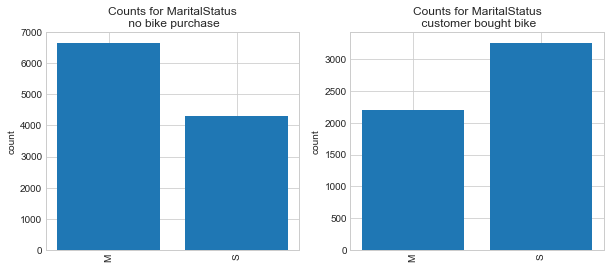

In [13]:
cat_cols = ['Occupation','Gender','MaritalStatus']

work_cust['dummy'] = np.ones(shape = work_cust.shape[0])
for col in cat_cols:
    print(col)
    counts = work_cust[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n no bike purchase')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n customer bought bike')
    plt.ylabel('count')
    plt.show()

In [14]:
work_cust.to_csv('work_cust.csv')